### Explore Phoenix Vendor Payments from 2014 - 2018

In [3]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
files = glob.glob('data/cleaned_data/*.csv')

payments = pd.concat([pd.read_csv(f, dtype={'commitmt_item_name': 'str', 'dept._descrptn': 'str', 'vendor_name': 'str'}) \
                      for f in files], sort=True)

In [5]:
payments.shape

(2215460, 5)

In [6]:
payments.dtypes

check/payment_date     object
commitmt_item_name     object
dept._descrptn         object
invoice_net_amt       float64
vendor_name            object
dtype: object

In [7]:
payments.set_index('vendor_name', inplace=True)

In [8]:
payments.head()

,check/payment_date,commitmt_item_name,dept._descrptn,invoice_net_amt
vendor_name,,,,
3M COMPANY,2014-01-02,Inventories,Street Transportation,-34.78
3M COMPANY,2014-01-02,Inventories,Street Transportation,-69.55
3M COMPANY,2014-01-02,Inventories,Street Transportation,-77.00
AGS SAFETY & SUPPLY,2014-01-02,Inventories,Public Works,0.01
AMERICAN EUROCOPTER CORPORATION,2014-01-02,Inventories,Police,-0.79


#### Change columns to appropriate data types

In [9]:
# change Check/Payment Date to datetime format
payments['check/payment_date'] = pd.to_datetime(payments['check/payment_date'])

In [10]:
payments.dtypes

check/payment_date    datetime64[ns]
commitmt_item_name            object
dept._descrptn                object
invoice_net_amt              float64
dtype: object

### How do payments track year over year, month over month?

In [35]:
# combine year and month in same column to be able to graph year + month together
payments['year_month'] = payments['check/payment_date'].apply(lambda x: str(x.year) + '.' + str(x.month).zfill(2))

In [12]:
# designate year and month in separate columns to be able to graph these separately
payments['year'] = payments['check/payment_date'].apply(lambda x: x.year)
payments['month'] = payments['check/payment_date'].apply(lambda x: x.month)

In [36]:
payments.head()

,check/payment_date,commitmt_item_name,dept._descrptn,invoice_net_amt,year_month,year,month
vendor_name,,,,,,,
3M COMPANY,2014-01-02,Inventories,Street Transportation,-34.78,2014.01,2014,1
3M COMPANY,2014-01-02,Inventories,Street Transportation,-69.55,2014.01,2014,1
3M COMPANY,2014-01-02,Inventories,Street Transportation,-77.00,2014.01,2014,1
AGS SAFETY & SUPPLY,2014-01-02,Inventories,Public Works,0.01,2014.01,2014,1
AMERICAN EUROCOPTER CORPORATION,2014-01-02,Inventories,Police,-0.79,2014.01,2014,1


In [14]:
payments.groupby('year')['invoice_net_amt'].sum().reset_index().style.format({'invoice_net_amt': '${0:,.0f}'})

,year,invoice_net_amt
0,2014,"$1,953,571,475"
1,2015,"$1,878,188,711"
2,2016,"$2,188,409,617"
3,2017,"$2,192,127,991"
4,2018,"$2,619,813,268"


In [15]:
payments.groupby(['year','month'])['invoice_net_amt'].sum().reset_index().head()

,year,month,invoice_net_amt
0,2014,1,1.417693e+08
1,2014,2,1.271078e+08
2,2014,3,1.125259e+08
3,2014,4,1.271444e+08
4,2014,5,1.357784e+08


In [16]:
payments.groupby(['year'])['invoice_net_amt'].sum().reset_index().head()

,year,invoice_net_amt
0,2014,1.953571e+09
1,2015,1.878189e+09
2,2016,2.188410e+09
3,2017,2.192128e+09
4,2018,2.619813e+09


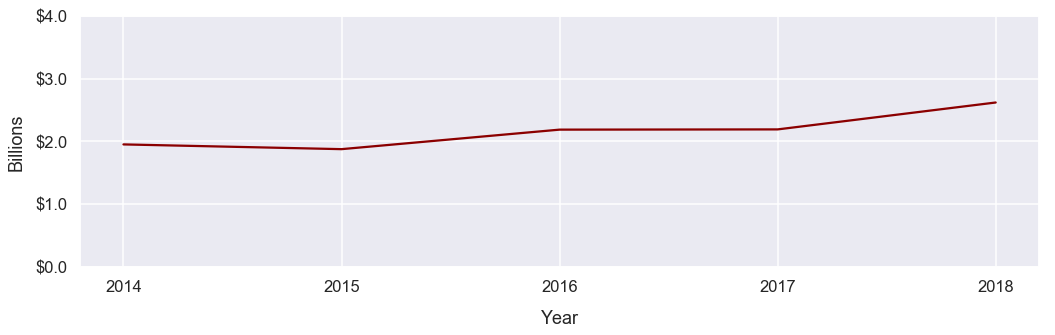

In [17]:
sns.set(rc={'figure.figsize':(15,5)})

sns.set_context('talk')
plt.ylim(0,4000000000)
plt.tight_layout()

ax = sns.lineplot(x=payments.groupby(['year'])['invoice_net_amt'].sum().reset_index().iloc[:,0], 
                  y=payments.groupby(['year'])['invoice_net_amt'].sum().reset_index().iloc[:,1], 
                  data=payments.groupby(['year'])['invoice_net_amt'].sum().reset_index(), 
                 color='darkred')

# plt.title("Year Over Year Payments")
plt.xlabel("Year", labelpad=15)
plt.ylabel("Billions", labelpad=10)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '$%1.1f' % (x*1e-9)))

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
plt.tight_layout()

# plt.savefig("visualizations/year_over_year.png")

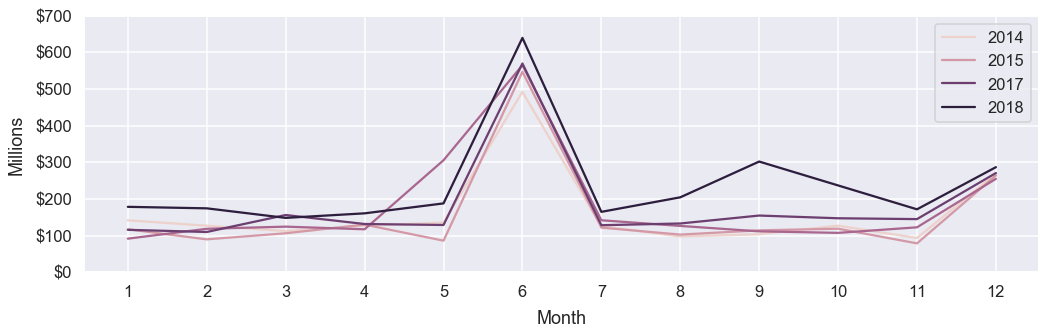

In [18]:
sns.set(rc={'figure.figsize':(15,5)})
plt.tight_layout()
sns.set_context('talk')
# sns.set_context('paper')
# sns.set_context('poster')

plt.ylim(0,700000000)

ax = sns.lineplot(x=payments.groupby(['year','month'])['invoice_net_amt'].sum().reset_index().iloc[:,1], \
                  y=payments.groupby(['year','month'])['invoice_net_amt'].sum().reset_index().iloc[:,2], \
                  hue=payments.groupby(['year','month'])['invoice_net_amt'].sum().reset_index().iloc[:,0], \
                  data=payments.groupby(['year','month'])['invoice_net_amt'].sum().reset_index())

# plt.title("Payments By Month Of The Year")
plt.xlabel("Month", labelpad=10)
plt.ylabel("Millions", labelpad=10)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '$%1.0f' % (x*1e-6)))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
plt.tight_layout()

# plt.savefig("visualizations/month_over_month.png")

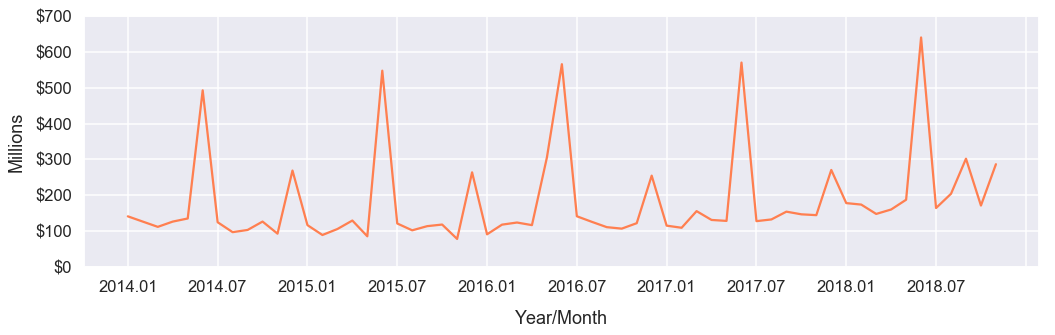

In [48]:
sns.set(rc={'figure.figsize':(15,5)})
plt.tight_layout()
sns.set_context("talk")
# sns.set_context("notebook", font_scale=1.3)

plt.ylim(0,700000000)

ax = sns.lineplot(x=payments.groupby('year_month')['invoice_net_amt'].sum().reset_index().iloc[:,0], \
                  y=payments.groupby('year_month')['invoice_net_amt'].sum().reset_index().iloc[:,1], \
                  data=payments.groupby('year_month')['invoice_net_amt'].sum().reset_index(),
                 color='coral')

# plt.title("Payments By Year/Month",fontsize=20)
plt.xlabel("Year/Month", labelpad=15)
plt.ylabel("Millions",labelpad=10)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '$%1.0f' % (x*1e-6)))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(6))
plt.tight_layout()

plt.savefig("visualizations/payments_by_year_month.png")

## Which departments spent the most?  And how do costs track over years and months?

In [39]:
top_depts = payments.groupby(['dept._descrptn'])['invoice_net_amt'].sum().sort_values(ascending=False).head(13)

#exclude debt departments since they have such large punctuated payments, see below for chart with only debt departments 
top_depts_non_debt = top_depts[(~(top_depts.index == 'Debt') & 
                          ~(top_depts.index == 'Debt - CIC Lease Purchase') &
                          ~(top_depts.index == 'Debt - General Obligation Bonds'))]

In [21]:
top_depts_non_debt

dept._descrptn
Public Transit                     1.752983e+09
Aviation                           1.518934e+09
Water Services                     1.420216e+09
Street Transportation              6.314653e+08
Public Works                       5.910387e+08
Police                             2.343153e+08
Trust                              2.269841e+08
Information Technology Services    2.257665e+08
Parks and Recreation               1.956821e+08
Human Services                     1.718563e+08
Name: invoice_net_amt, dtype: float64

In [40]:
top_depts_non_debt_data = payments[payments['dept._descrptn'].isin(top_depts_non_debt.index)]
top_depts_non_debt_data.head()

,check/payment_date,commitmt_item_name,dept._descrptn,invoice_net_amt,year_month,year,month
vendor_name,,,,,,,
3M COMPANY,2014-01-02,Inventories,Street Transportation,-34.78,2014.01,2014,1
3M COMPANY,2014-01-02,Inventories,Street Transportation,-69.55,2014.01,2014,1
3M COMPANY,2014-01-02,Inventories,Street Transportation,-77.00,2014.01,2014,1
AGS SAFETY & SUPPLY,2014-01-02,Inventories,Public Works,0.01,2014.01,2014,1
AMERICAN EUROCOPTER CORPORATION,2014-01-02,Inventories,Police,-0.79,2014.01,2014,1


In [41]:
top_depts_non_debt_month_yr = top_depts_non_debt_data.groupby(['year_month', 'dept._descrptn'])['invoice_net_amt'].sum().to_frame().reset_index()
top_depts_non_debt_month_yr.head().style.format({'invoice_net_amt': '${0:,.0f}'})

,year_month,dept._descrptn,invoice_net_amt
0,2014.01,Aviation,"$20,222,580"
1,2014.01,Human Services,"$2,042,462"
2,2014.01,Information Technology Services,"$1,988,706"
3,2014.01,Parks and Recreation,"$1,932,571"
4,2014.01,Police,"$7,710,422"


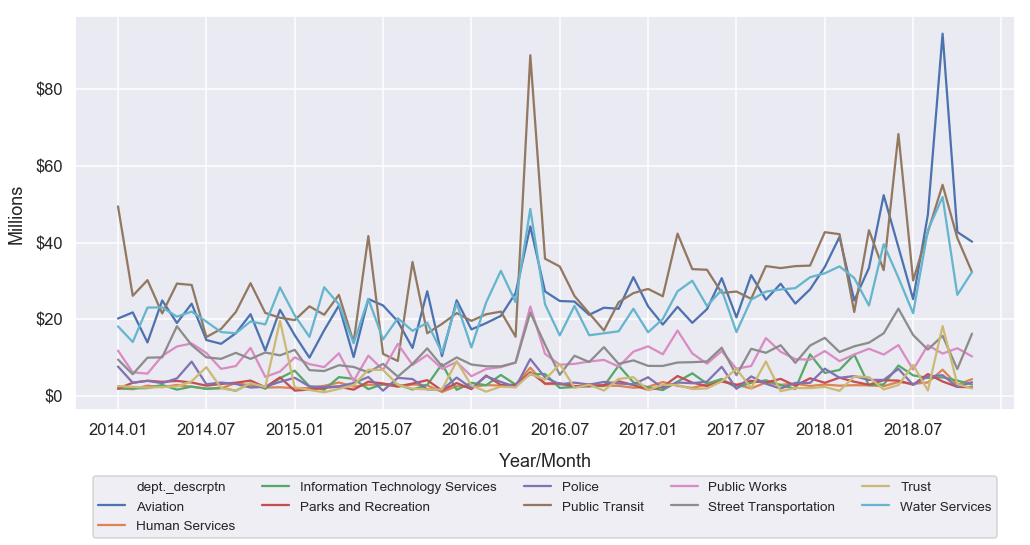

In [49]:
sns.set(rc={'figure.figsize':(15,8)})
plt.tight_layout()
sns.set_context("talk")
# sns.set_context("notebook", font_scale=1.3)

ax = sns.lineplot(x=top_depts_non_debt_month_yr.iloc[:,0], 
                  y=top_depts_non_debt_month_yr.iloc[:,2], 
                  hue=top_depts_non_debt_month_yr.iloc[:,1],
                  data=top_depts_non_debt_month_yr)

# plt.title("Payments By Year/Month",fontsize=20)
plt.xlabel("Year/Month", labelpad=15)
plt.ylabel("Millions",labelpad=10)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '$%1.0f' % (x*1e-6)))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(6))

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=5, fontsize=13.5)

plt.tight_layout()

plt.savefig("visualizations/non_debt_top_departments_payments_by_year_month.png")

In [43]:
#exclude debt since it has such large punctuated payments
top_depts_debt = top_depts[~(~(top_depts.index == 'Debt') & 
                          ~(top_depts.index == 'Debt - CIC Lease Purchase') &
                          ~(top_depts.index == 'Debt - General Obligation Bonds'))]
top_depts_debt

dept._descrptn
Debt                               1.654956e+09
Debt - CIC Lease Purchase          8.621091e+08
Debt - General Obligation Bonds    2.361726e+08
Name: invoice_net_amt, dtype: float64

In [44]:
top_depts_debt_data = payments[payments['dept._descrptn'].isin(top_depts_debt.index)]
top_depts_debt_data.head()

,check/payment_date,commitmt_item_name,dept._descrptn,invoice_net_amt,year_month,year,month
vendor_name,,,,,,,
US BANK,2014-01-02,Lease/Purch Pmt-Int,Debt,3217.17,2014.01,2014,1
US BANK,2014-01-02,Lease/Purch Pmt-Int,Debt,12709.43,2014.01,2014,1
ROYAL BANK OF CANADA,2014-01-03,Cons/Other Prof Svcs,Debt,100714.16,2014.01,2014,1
ROYAL BANK OF CANADA,2014-01-03,Cons/Other Prof Svcs,Debt,25494.06,2014.01,2014,1
BANK OF AMERICA CA9-705-07-05,2014-04-11,Cons/Other Prof Svcs,Debt,1497.06,2014.04,2014,4


In [45]:
top_depts_debt_month_yr = top_depts_debt_data \
    .groupby(['year_month', 'dept._descrptn'])['invoice_net_amt'] \
    .sum() \
    .to_frame() \
    .reset_index()

top_depts_debt_month_yr.head().style.format({'invoice_net_amt': '${0:,.0f}'})

,year_month,dept._descrptn,invoice_net_amt
0,2014.01,Debt,"$314,471"
1,2014.02,Debt,"$25,030,170"
2,2014.03,Debt,"$523,738"
3,2014.04,Debt,"$2,532,999"
4,2014.05,Debt,"$4,254"


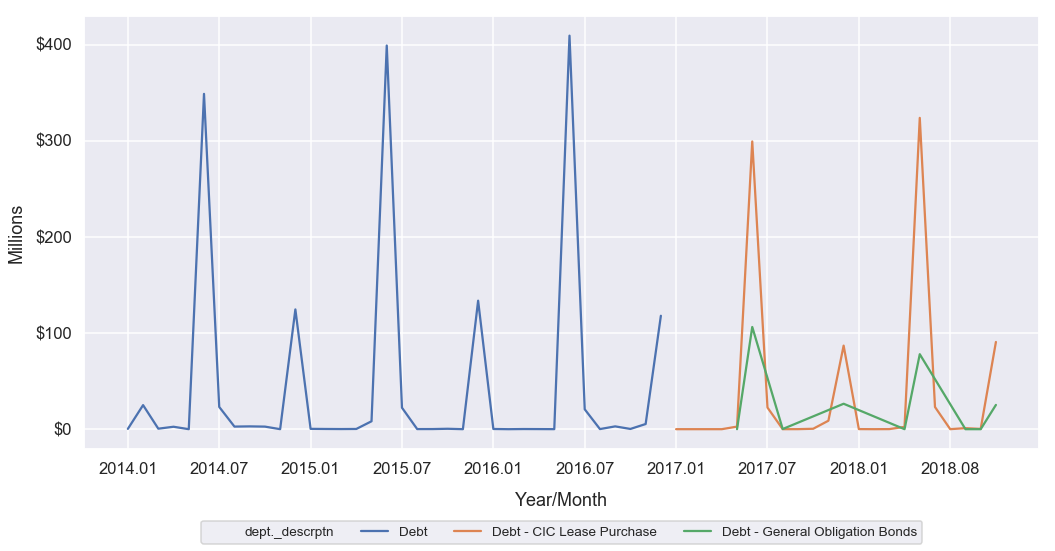

In [50]:
sns.set(rc={'figure.figsize':(15,8)})
plt.tight_layout()
sns.set_context("talk")
# sns.set_context("notebook", font_scale=1.3)

ax = sns.lineplot(x=top_depts_debt_month_yr.iloc[:,0], 
                  y=top_depts_debt_month_yr.iloc[:,2], 
                  hue=top_depts_debt_month_yr.iloc[:,1],
                  data=top_depts_debt_month_yr)

# plt.title("Payments By Year/Month",fontsize=20)
plt.xlabel("Year/Month", labelpad=15)
plt.ylabel("Millions",labelpad=10)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '$%1.0f' % (x*1e-6)))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(6))

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=5, fontsize=13.5)

plt.tight_layout()

plt.savefig("visualizations/debt_departments_payments_by_year_month.png")

## How are payments distributed by amount?

In [29]:
payments.head()

,check/payment_date,commitmt_item_name,dept._descrptn,invoice_net_amt,year_month,year,month
vendor_name,,,,,,,
3M COMPANY,2014-01-02,Inventories,Street Transportation,-34.78,201401,2014,1
3M COMPANY,2014-01-02,Inventories,Street Transportation,-69.55,201401,2014,1
3M COMPANY,2014-01-02,Inventories,Street Transportation,-77.00,201401,2014,1
AGS SAFETY & SUPPLY,2014-01-02,Inventories,Public Works,0.01,201401,2014,1
AMERICAN EUROCOPTER CORPORATION,2014-01-02,Inventories,Police,-0.79,201401,2014,1


In [30]:
payments_log = payments[['invoice_net_amt']].copy()

In [31]:
payments_log_filtered = payments_log.loc[lambda payments_log: payments_log['invoice_net_amt'] > 1, :]

In [32]:
payments_log_filtered['log'] = np.log(payments_log_filtered['invoice_net_amt'])

C:\Users\mrkjh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
payments_log_filtered.head()

,invoice_net_amt,log
vendor_name,,
AGENCIES TOOL CENTER,587.24,6.375434
ALTEC INDUSTRIES INC,224.67,5.414633
ALTEC INDUSTRIES INC,26.30,3.269569
ALTERNATIVE HOSE INC,47.01,3.850360
AMERICAN FILTER & EQUIPMENT CORP,1.25,0.223144


(array([9.65900e+03, 1.42130e+04, 1.72090e+04, 2.18670e+04, 3.09870e+04,
        4.15420e+04, 6.27110e+04, 7.46950e+04, 8.59110e+04, 9.98900e+04,
        1.25038e+05, 1.14766e+05, 1.28425e+05, 1.28183e+05, 1.22540e+05,
        1.08537e+05, 1.00150e+05, 9.05020e+04, 7.78460e+04, 6.86760e+04,
        5.45630e+04, 4.73690e+04, 3.94190e+04, 3.66620e+04, 2.68940e+04,
        1.78230e+04, 1.36710e+04, 1.12170e+04, 1.04040e+04, 7.21500e+03,
        5.69000e+03, 4.42300e+03, 3.60100e+03, 2.42400e+03, 2.03600e+03,
        1.41800e+03, 1.40500e+03, 8.14000e+02, 6.30000e+02, 4.24000e+02,
        2.46000e+02, 2.46000e+02, 1.55000e+02, 1.20000e+02, 8.60000e+01,
        5.80000e+01, 1.80000e+01, 1.20000e+01, 2.00000e+00, 2.00000e+00]),
 array([9.95033085e-03, 3.66282606e-01, 7.22614881e-01, 1.07894716e+00,
        1.43527943e+00, 1.79161171e+00, 2.14794398e+00, 2.50427626e+00,
        2.86060853e+00, 3.21694081e+00, 3.57327308e+00, 3.92960536e+00,
        4.28593763e+00, 4.64226991e+00, 4.99860218e+

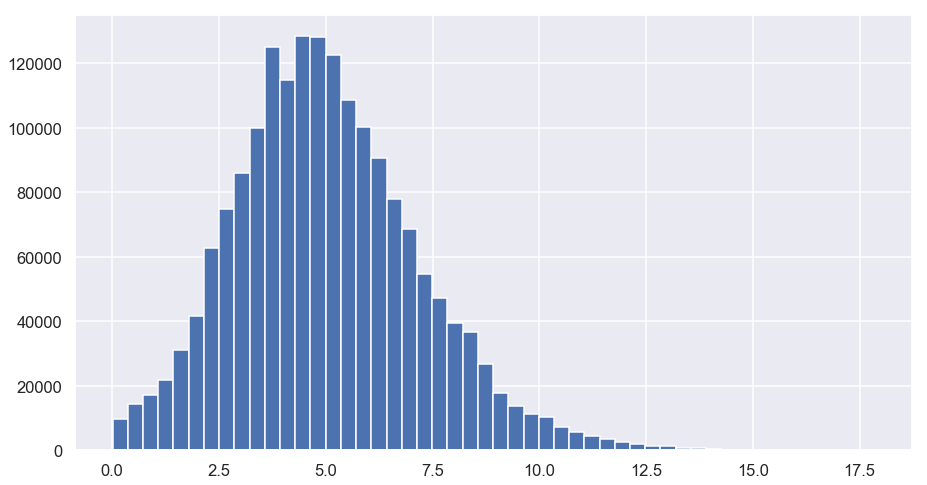

In [34]:
plt.figure(figsize=(15,8))

plt.hist(payments_log_filtered['log'], bins=50)